# Визуализация с seaborn

## Урок 1. Что такое seaborn

В этом уроке вы узнаете, что такое seaborn, а также, зачем нужна еще одна библиотека для визуализации, если уже есть `matplotlib`.



`seaborn` - это не замена `matplotlib`, а его дополнение, которое существенно упрощает построение графиков, часто используемых в анализе данных. Кроме того, `seaborn` ориентирован на работу с датафреймами `pandas`, поэтому, во многих случаях, на подготовку данных для `seaborn` требуется меньше времени, чем для `matplotlib`.

Ссылка на документацию seaborn: <https://seaborn.pydata.org/index.html>

Давайте теперь посмотрим на практике, чем построение визуализаций в `seaborn` отличается от работы в `matplotlib`. Рассмотрим эти отличия на примере графика гистограмм минимальных зарплат в 2000 и 2010 годах, который мы строили на предыдущем модуле.

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns 

In [2]:
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('wage-data-coast.csv')
df.head()

,Year,State,Salary,IsCoastal
0,1968,Alabama,0.00000,0
1,1968,Alaska,2.10000,1
2,1968,Arizona,0.66000,0
3,1968,Arkansas,0.15625,0
4,1968,California,1.65000,1


Text(0, 0.5, '# записей')

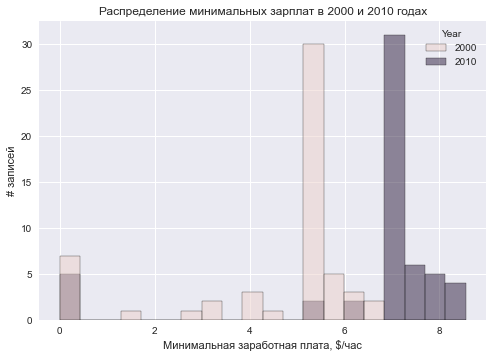

In [4]:
data = df[df['Year'].isin([2000, 2010])]
ax = sns.histplot(data=data, x='Salary', hue='Year', bins=20)

ax.set_title('Распределение минимальных зарплат в 2000 и 2010 годах')
ax.set_xlabel('Минимальная заработная плата, $/час')
ax.set_ylabel('# записей')

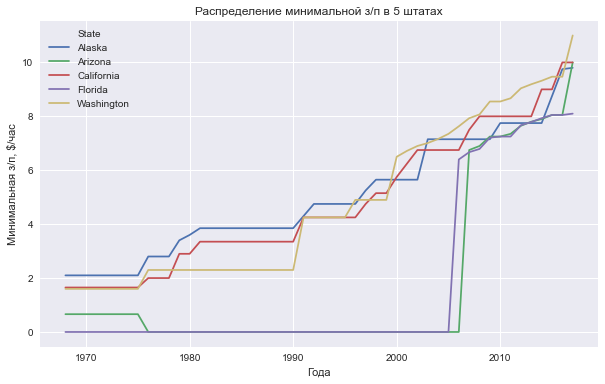

In [5]:
data = df[df['State'].isin(['Alaska', 'California', 'Washington', 'Arizona', 'Florida'])]

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(data=data, x='Year', y='Salary', hue='State', ax=ax)

ax.set_title('Распределение минимальной з/п в 5 штатах')
ax.set_xlabel('Года')
ax.set_ylabel('Минимальная з/п, $/час')
plt.show()

Text(0, 0.5, '# записей')

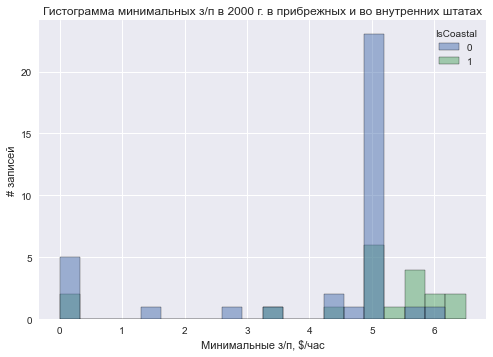

In [6]:
data = df[df['Year'].eq(2000)]

ax = sns.histplot(data=data, x='Salary', hue='IsCoastal', bins=20)
ax.set_title('Гистограмма минимальных з/п в 2000 г. в прибрежных и во внутренних штатах')
ax.set_xlabel('Минимальные з/п, $/час')
ax.set_ylabel('# записей')

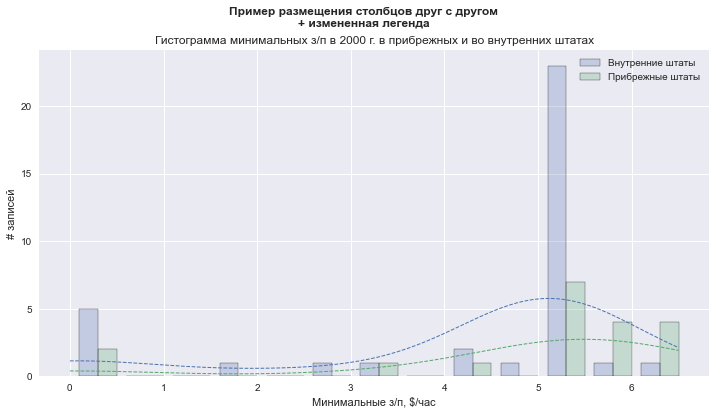

In [7]:
legend_text = {'1':'Прибрежные штаты', '0':'Внутренние штаты'}
data = df[df['Year'].eq(2000)]

fig, ax = plt.subplots(figsize=(12, 6))

ax = sns.histplot(
    data=data, x='Salary', 
    hue='IsCoastal', ax=ax,
    # bins=25, 
    alpha=.25,
    binwidth=.5,
    multiple='dodge', 
    shrink=.8,
    # element='step',
    # fill=False,
    # shrink=.1,
    kde=True,
    line_kws={'linestyle': 'dashed', 'linewidth': 1, 'markersize': 2},
    color='Crimson',
    )

fig.suptitle('Пример размещения столбцов друг с другом\n+ измененная легенда', fontsize=12, fontweight='bold')
ax.set_title('Гистограмма минимальных з/п в 2000 г. в прибрежных и во внутренних штатах')
ax.set_xlabel('Минимальные з/п, $/час')
ax.set_ylabel('# записей')
legend = ax.get_legend()
legend.set_title('')
for label in legend.get_texts():
    label.set_text(legend_text.get(label.get_text(), 'Nan'))
plt.show()

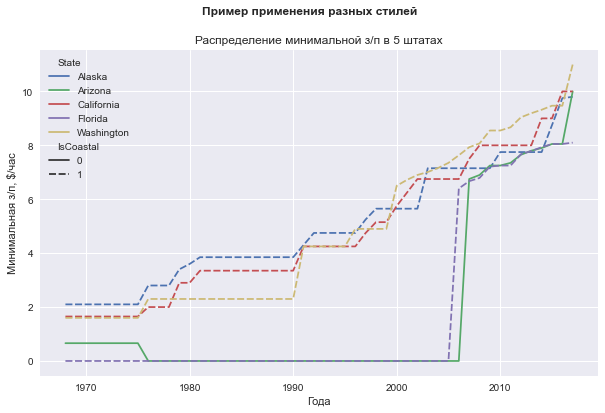

In [8]:
data = df[df['State'].isin(['Alaska', 'California', 'Washington', 'Arizona', 'Florida'])]

fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.lineplot(data=data, x='Year', y='Salary', hue='State', ax=ax, style='IsCoastal')

fig.suptitle('Пример применения разных стилей', fontsize=12, fontweight='bold')
ax.set_title('Распределение минимальной з/п в 5 штатах')
ax.set_xlabel('Года')
ax.set_ylabel('Минимальная з/п, $/час')
plt.show()

In [9]:
df2 = pd.read_csv('wage-data-coast-with-population.csv')

In [10]:
# подготовка вспомогательного датасета 
# для расчета величины размера линий 
# в зависимости от населения в штате

dt1 = df2[df2['Year'] == 2017][['State', 'Population']].sort_values(['Population'])
dt1.loc[:, 'Size'] = range(1, dt1.shape[0] + 1)


# добавим полученные данные индекса 
# величины к основному датасету

df2 = df2.merge(dt1[['State', 'Size']], how='left', on='State')

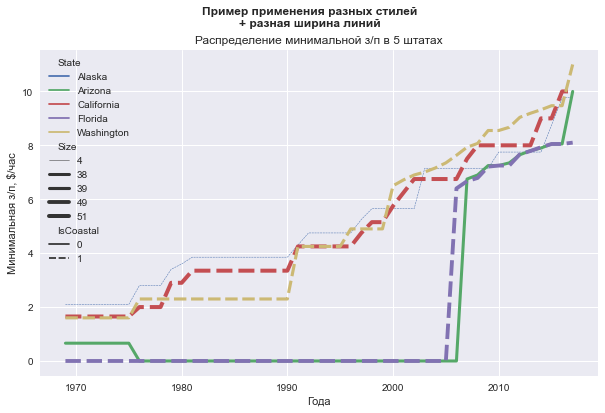

In [11]:
data = df2[df2['State'].isin(['Alaska', 'California', 'Washington', 'Arizona', 'Florida'])]

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    data=data,  ax=ax, 
    x='Year', y='Salary', 
    hue='State', style='IsCoastal', 
    size='Size', sizes=(.5, 4)
    )

fig.suptitle('Пример применения разных стилей\n+ разная ширина линий', fontsize=12, fontweight='bold')
ax.set_title('Распределение минимальной з/п в 5 штатах')
ax.set_xlabel('Года')
ax.set_ylabel('Минимальная з/п, $/час')
plt.show()

In [12]:
# Рассчет динамики роста популяции 
# Для начала создаем серию с 
# минимальными значениям по штатам
df_state_min_population = df2.groupby(by='State')['Population'].agg('min')
# Затем добавляем поле, который показывает 
# коэффициент популяции по отношению к 
# минимальному значению по данному штату
df2.loc[:, 'SizeIdx'] = df2.apply(lambda x: x['Population'] / df_state_min_population.loc[x['State']], axis=1)

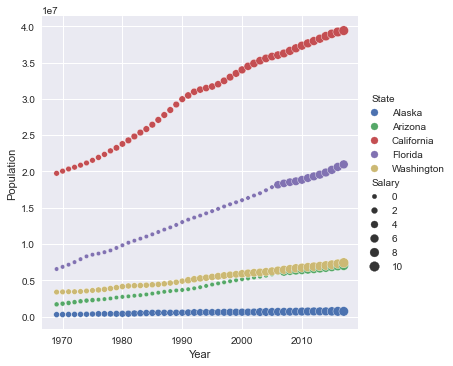

In [13]:
data = df2[df2['State'].isin(['Alaska', 'California', 'Washington', 'Arizona', 'Florida'])]

# fig, ax = plt.subplots(figsize=(10, 6))
sns.relplot(
    data=data, 
    x='Year', y='Population', 
    hue='State', 
    # style='IsCoastal', 
    size='Salary', sizes=(20, 100),
    )

# fig.suptitle('Пример применения разных стилей', fontsize=12, fontweight='bold')
# ax.set_title('Распределение минимальной з/п в 5 штатах')
# ax.set_xlabel('Года')
# ax.set_ylabel('Минимальная з/п, $/час')
plt.show()

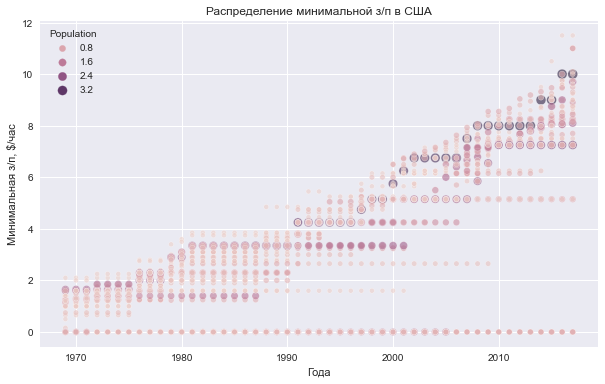

In [14]:
# data = df2[df2['State'].isin(['Alaska', 'California', 'Washington', 'Arizona', 'Florida'])]
data = df2

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(
    data=data,  ax=ax, 
    x='Year', y='Salary', 
    hue='Population', 
    # style='IsCoastal', 
    alpha=.6,
    size='Population'
    # size='Size', sizes=(10, 50),
    )

# fig.suptitle('Пример применения разных стилей', fontsize=12, fontweight='bold')
ax.set_title('Распределение минимальной з/п в США')
ax.set_xlabel('Года')
ax.set_ylabel('Минимальная з/п, $/час')
plt.show()

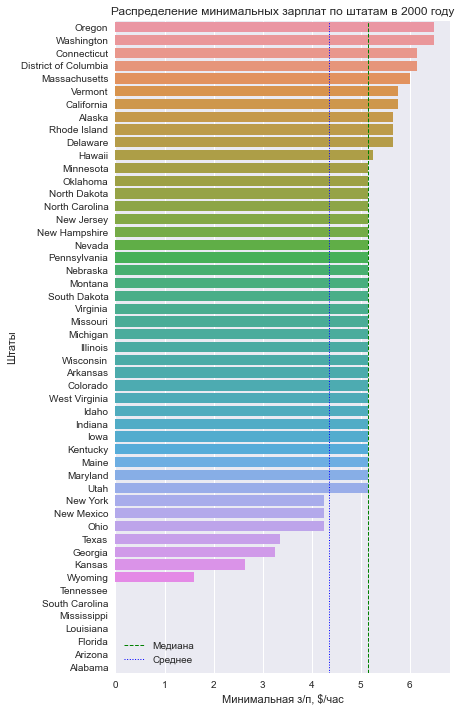

In [15]:
data = df2[df2['Year'] == 2000].sort_values(['Salary'], ascending=False)

fig, ax = plt.subplots(figsize=(6,12))
sns.barplot(
    data=data, ax=ax,
    y='State', x='Salary',
    )

ax.axvline(x=data['Salary'].median(), label='Медиана', linewidth=1, linestyle='--', color='green')
ax.axvline(x=data['Salary'].mean(), label='Среднее', linewidth=1, linestyle=':', color='blue')


ax.set_title('Распределение минимальных зарплат по штатам в 2000 году')
ax.set_xlabel('Минимальная з/п, $/час')
ax.set_ylabel('Штаты')
ax.legend()
plt.show()

No handles with labels found to put in legend.


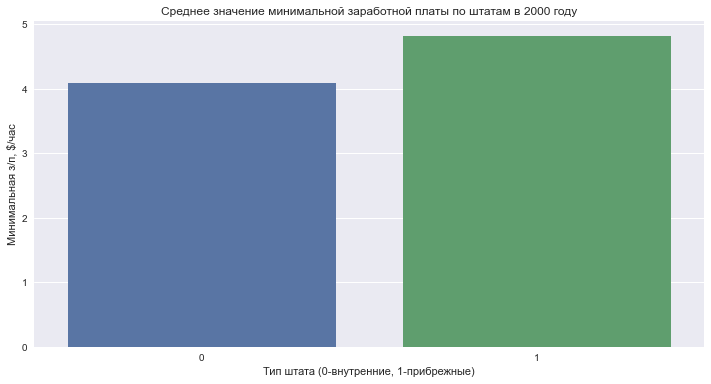

In [16]:
data = df2[df2['Year'] == 2000]

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(
    data=data, ax=ax,
    x='IsCoastal', y='Salary',
    ci=None,
    )


ax.set_title('Среднее значение минимальной заработной платы по штатам в 2000 году')
ax.set_xlabel('Тип штата (0-внутренние, 1-прибрежные)')
ax.set_ylabel('Минимальная з/п, $/час')
ax.legend()
plt.show()

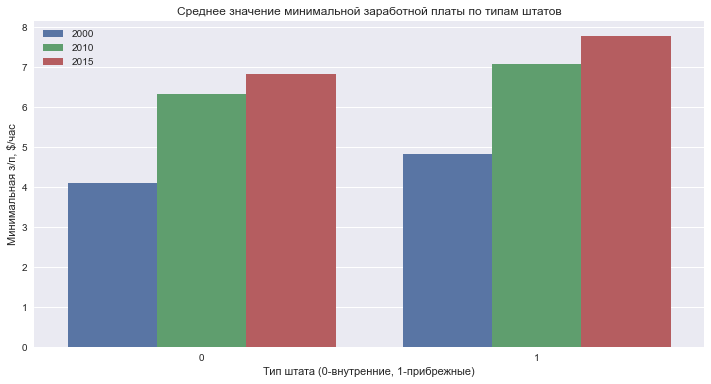

In [17]:
data = df2[df2['Year'].isin([2000, 2010, 2015])]

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(
    data=data, ax=ax,
    x='IsCoastal', y='Salary',
    ci=None,
    hue='Year',
    )


ax.set_title('Среднее значение минимальной заработной платы по типам штатов')
ax.set_xlabel('Тип штата (0-внутренние, 1-прибрежные)')
ax.set_ylabel('Минимальная з/п, $/час')
ax.legend()
plt.show()

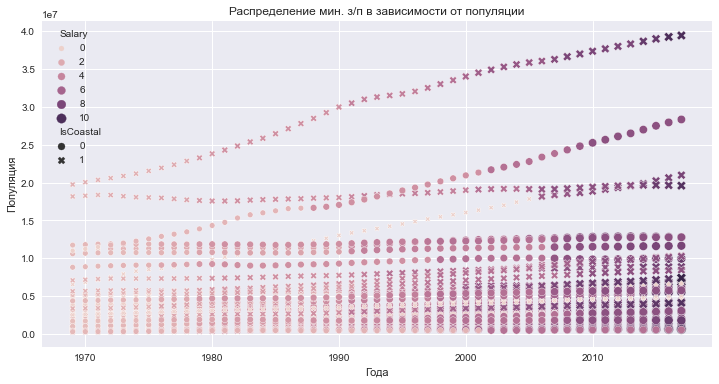

In [18]:
# точечная диаграмма x=год, y=население, цвет = в зависимости от величины min з/п в конкретном штате и конкретном году

data = df2

fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(
    data=data, ax=ax,
    x='Year', y='Population',
    hue='Salary', size='Salary',
    style='IsCoastal'
    )
ax.set_title('Распределение мин. з/п в зависимости от популяции')
ax.set_xlabel('Года')
ax.set_ylabel('Популяция')
plt.show()


In [19]:
df_diamonds = sns.load_dataset('diamonds')
df_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Итак, какие признаки входят в этот датасет. Начнем с правого края:
1. **x, y, z** - это ширина, высота и глубина бриллианта в миллиметрах
2. **price** - его цена в долларах
3. **table** - ширина верхней плоской части бриллианта, поделенная на ширину самой широкой части, умноженная на 100%
4. **depth** - относительная глубина бриллианта, вычисляемая по следующей формуле: depth = 100% * 2z / (x + y)
5. **clarity** - чистота бриллианта. Это категориальный признак, принимающий следующие значения: I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)
6. **color** - цвет бриллианта, from J (worst) to D (best)
7. **cut** - огранка, (Fair, Good, Very Good, Premium, Ideal)
8. **carat** - вес бриллианта в каратах.

Давайте узнаем, от чего зависит цена бриллиантов. Первый график, который нам может помочь - это `pairplot`. Этот график строит точечные графики для всех пар численных признаков в датасете. Его построение может занять какое-то время.

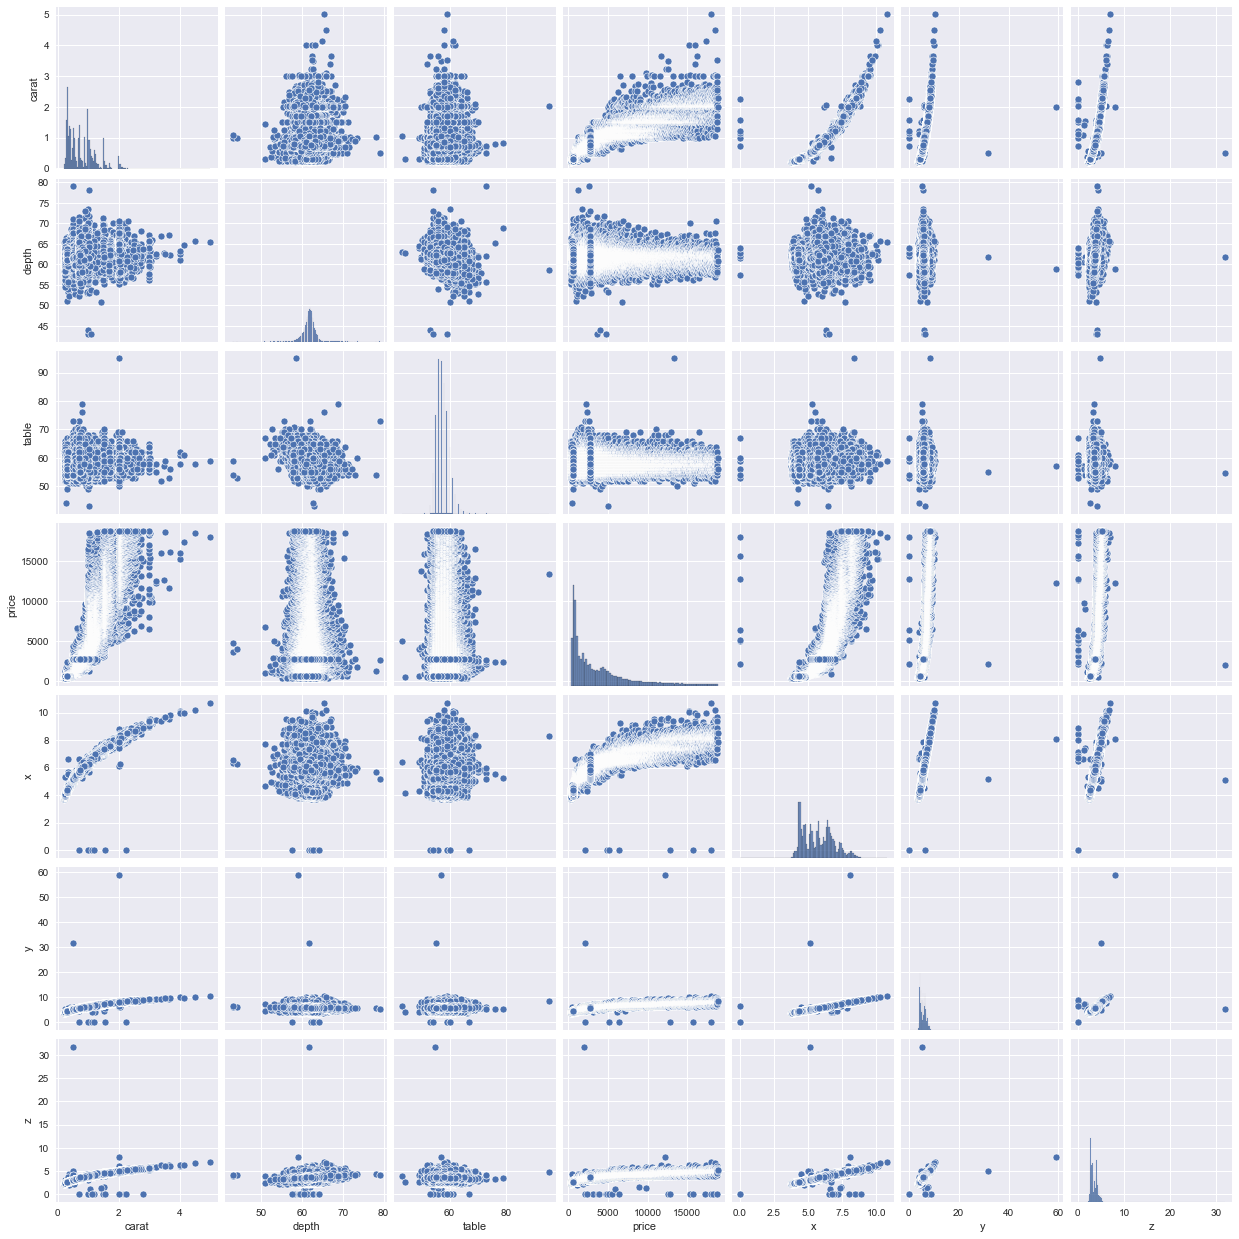

In [20]:
sns.pairplot(data=df_diamonds)
plt.show()

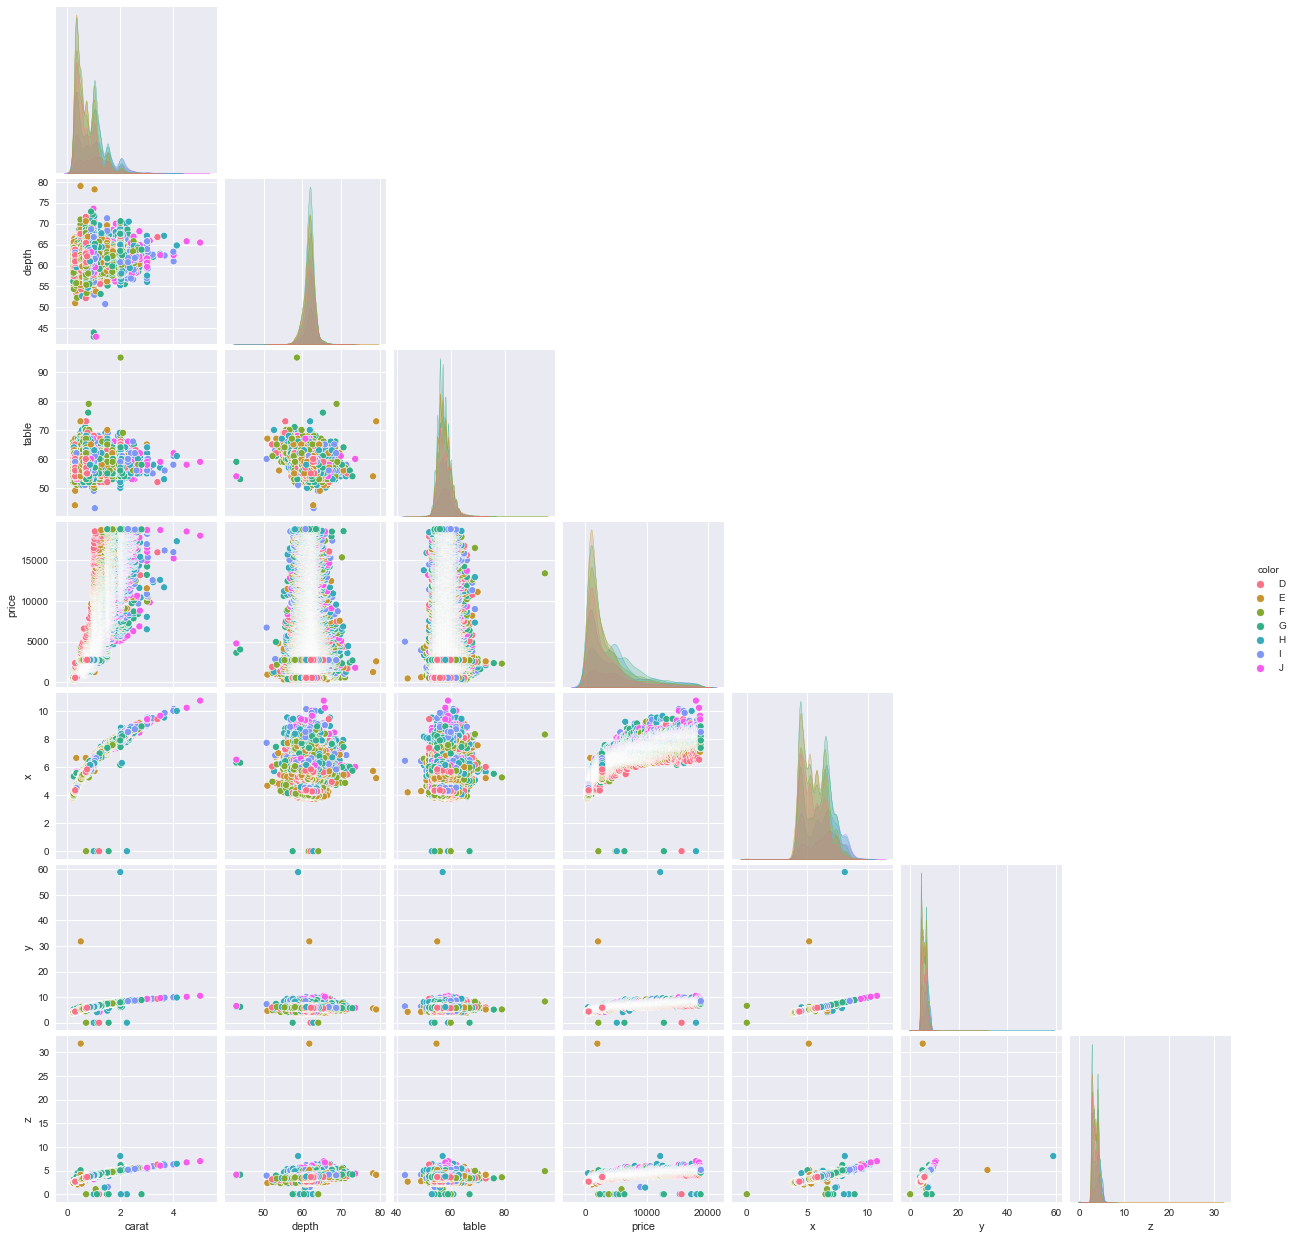

In [21]:
# проанализируем зависимость числовых характеристик
# в зависимости от цвета алмаза
sns.pairplot(data=df_diamonds, corner=True, hue='color')
plt.show()
# особой зависимости от цвета не наблюдается

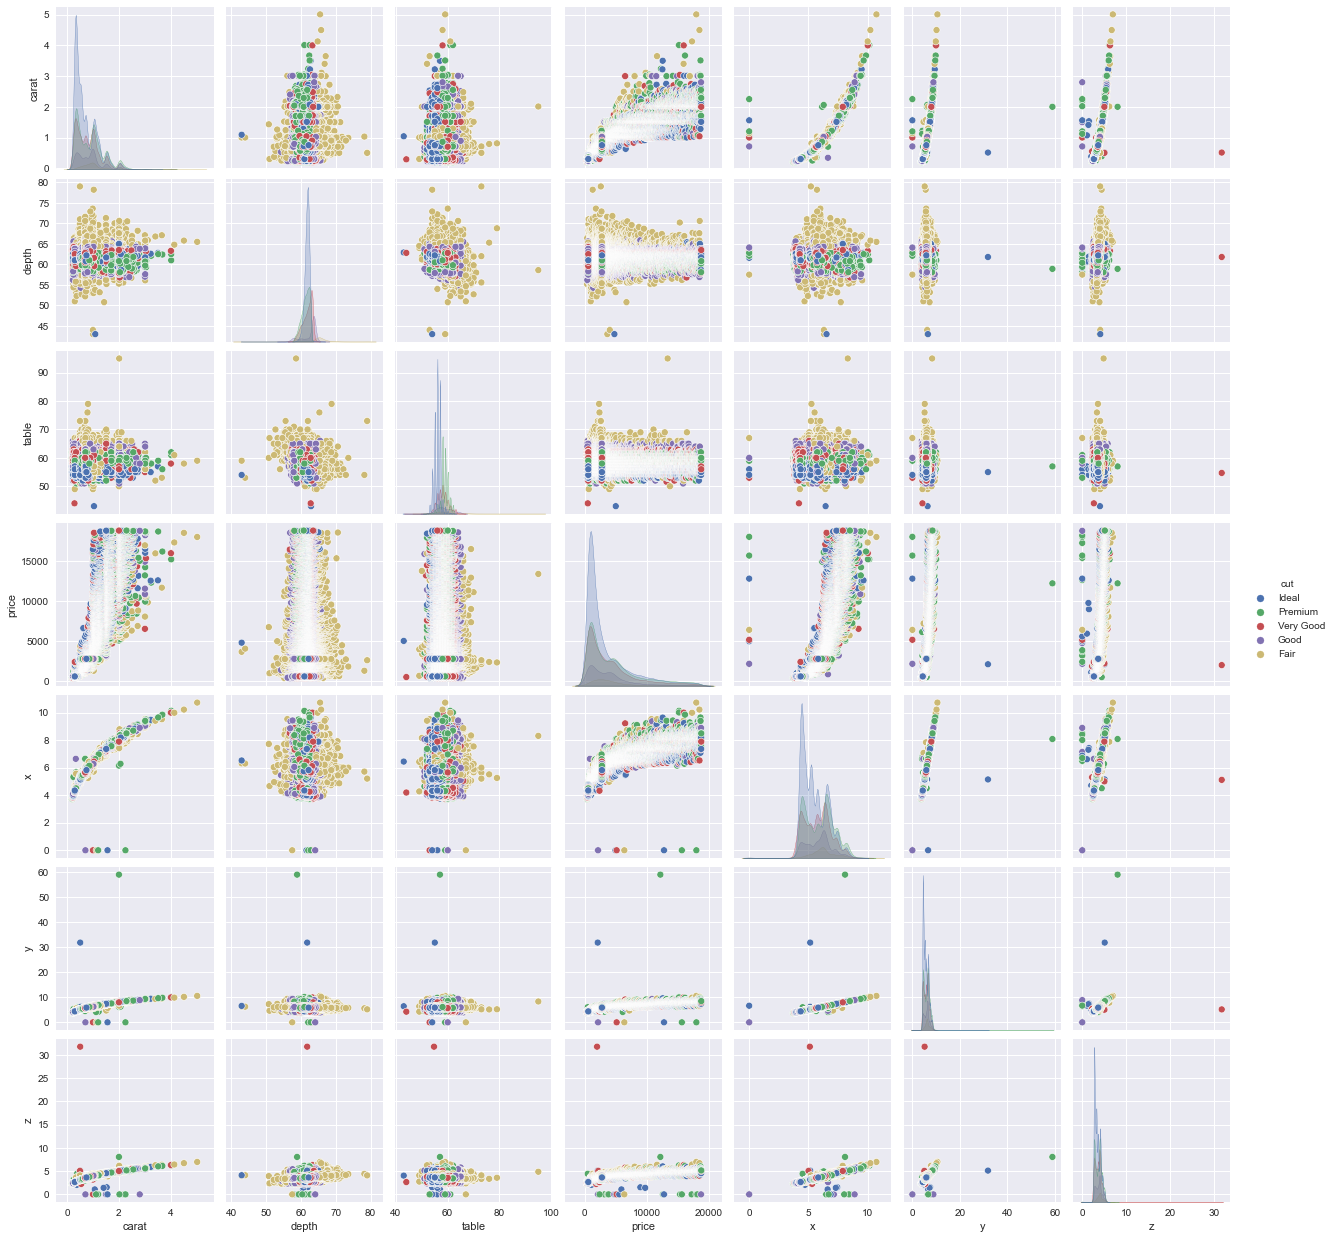

In [22]:
# проанализируем зависимость числовых характеристик
# в зависимости от цвета огранки
sns.pairplot(data=df_diamonds, hue='cut')
plt.show()
# особой зависимости от цвета не наблюдается

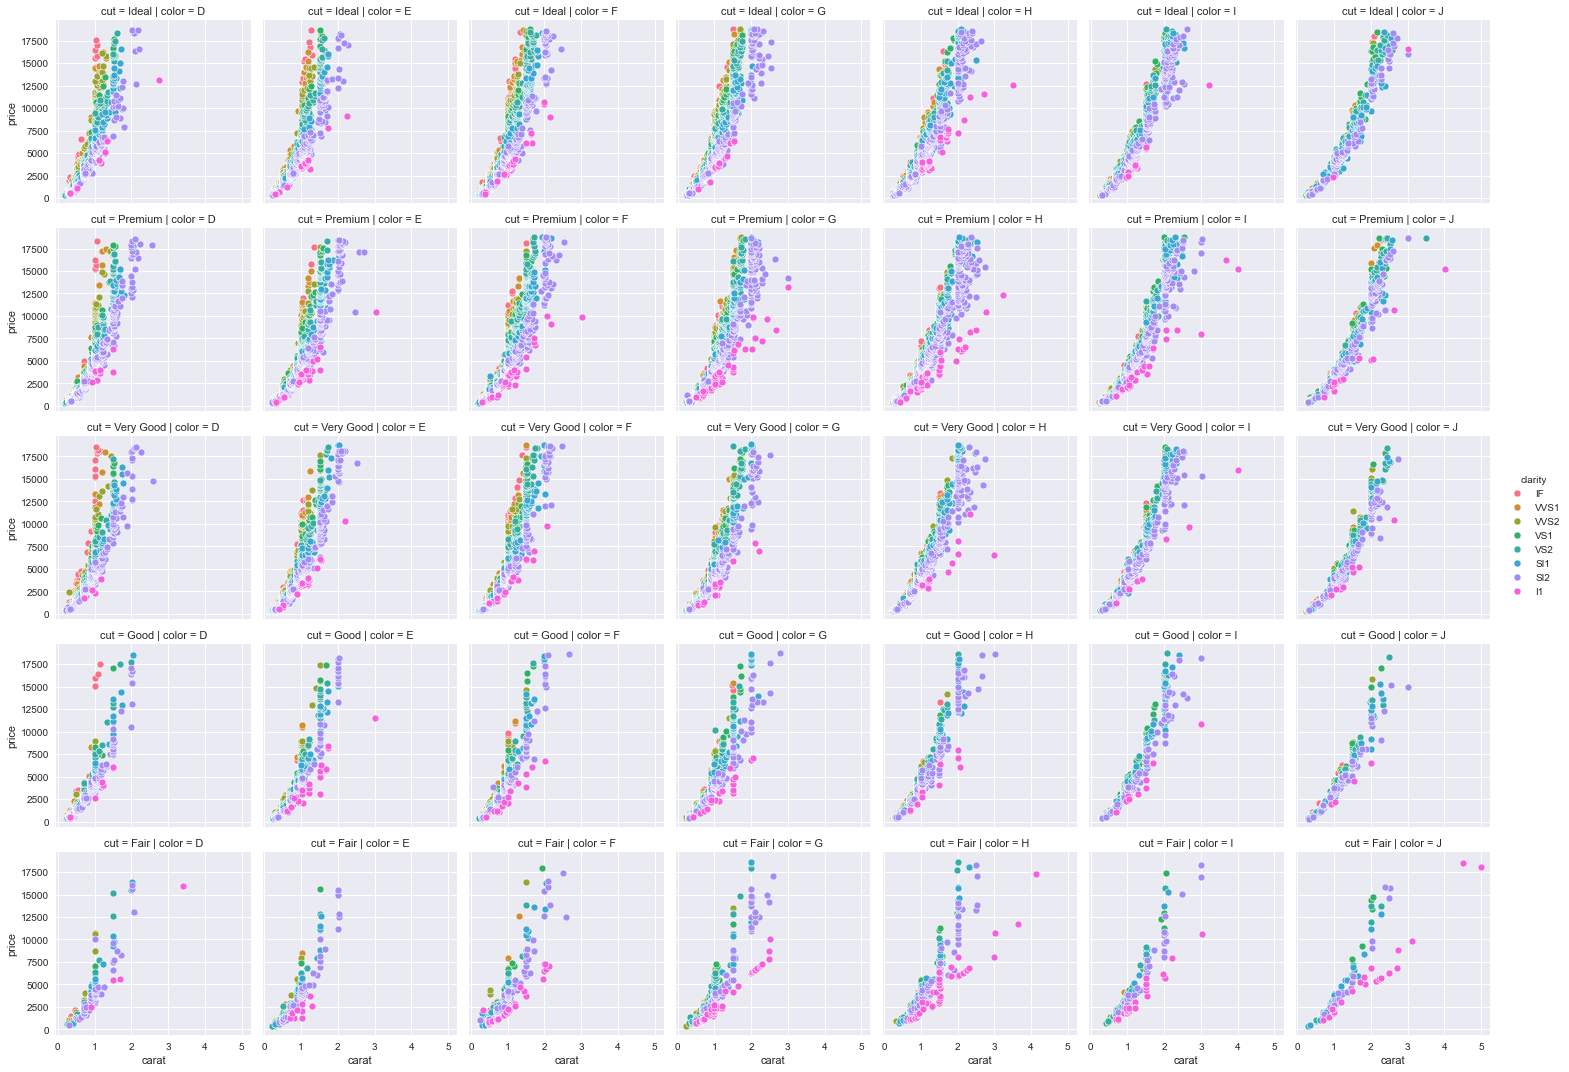

In [23]:
g = sns.FacetGrid(
    df_diamonds, 
    row='cut', col='color', hue='clarity', 
    # height=5
    )
g.map(sns.scatterplot, 'carat', 'price')
g.add_legend()
plt.show()

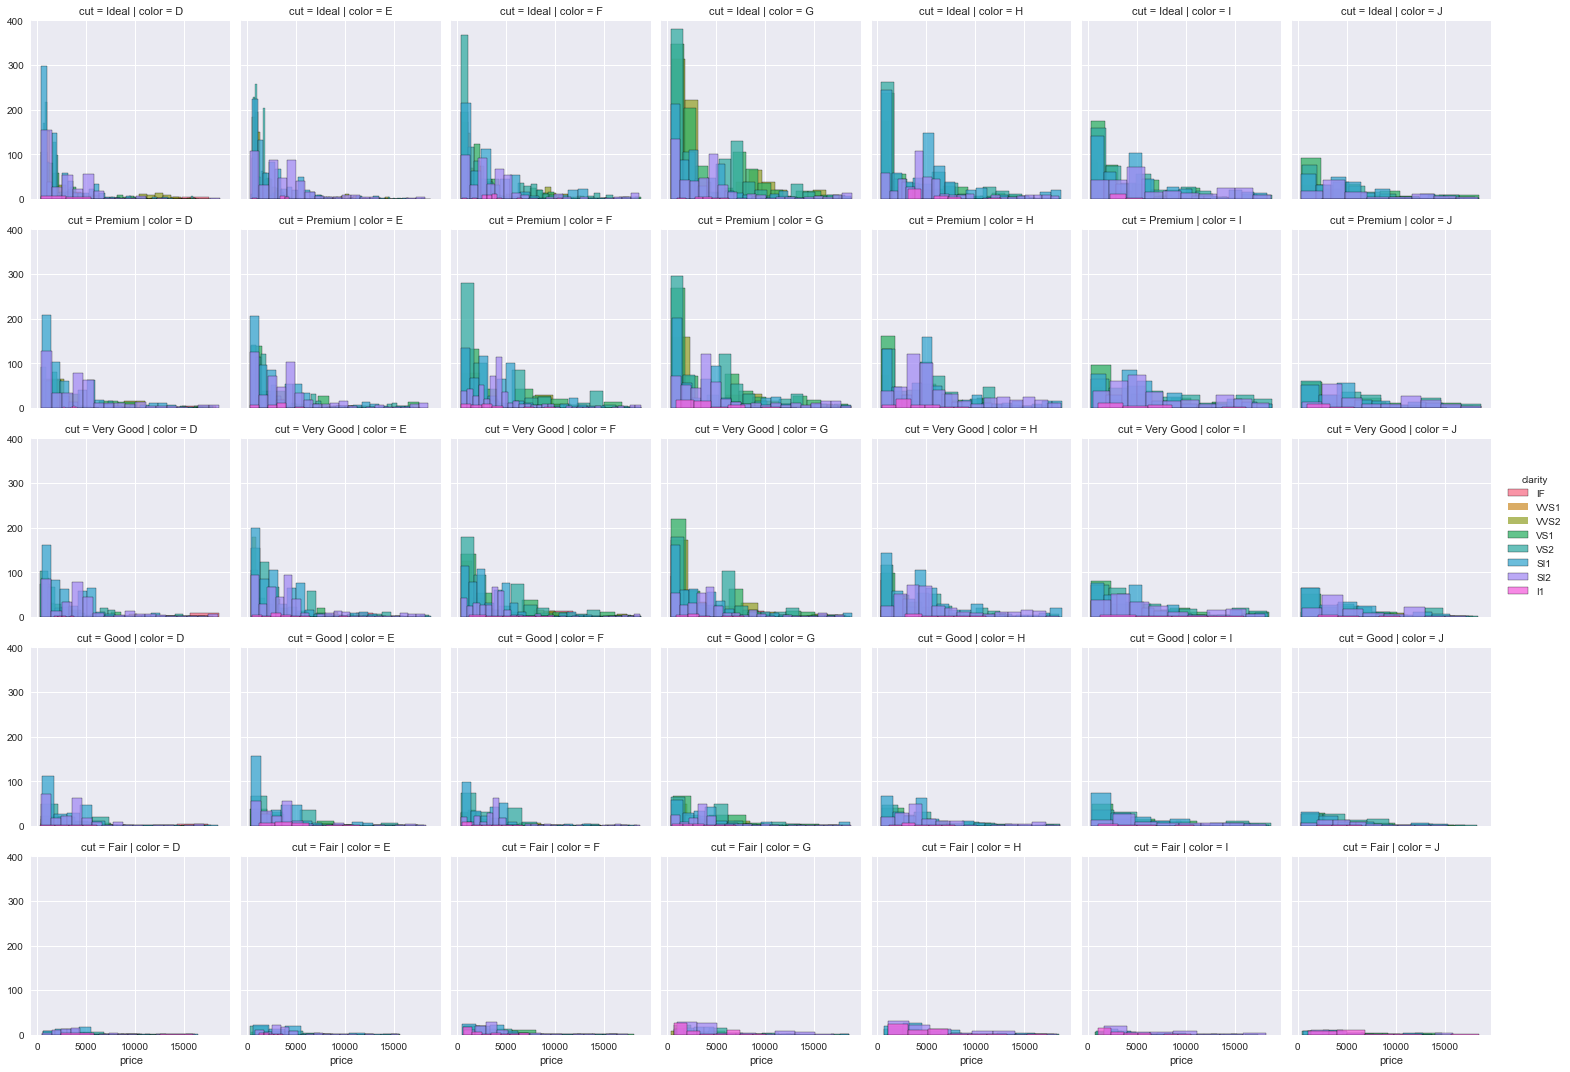

In [24]:
g = sns.FacetGrid(
    df_diamonds, 
    row='cut', col='color', hue='clarity', 
    # height=5
    )
g.map(sns.histplot, 'price',)
g.add_legend()
plt.show()

## Урок 3. Построение составных графиков

### Практика

#### Задание 1

Постройте FacetGrid, в котором строкам сетки будут соответствовать значения чистоты бриллианта, а столбцам сетки - значения огранки. Внутри сетки постройте точечные графики зависимости цены от высоты бриллианта (это параметр z). Разным цветом на графиках укажите бриллианты разного цвета.

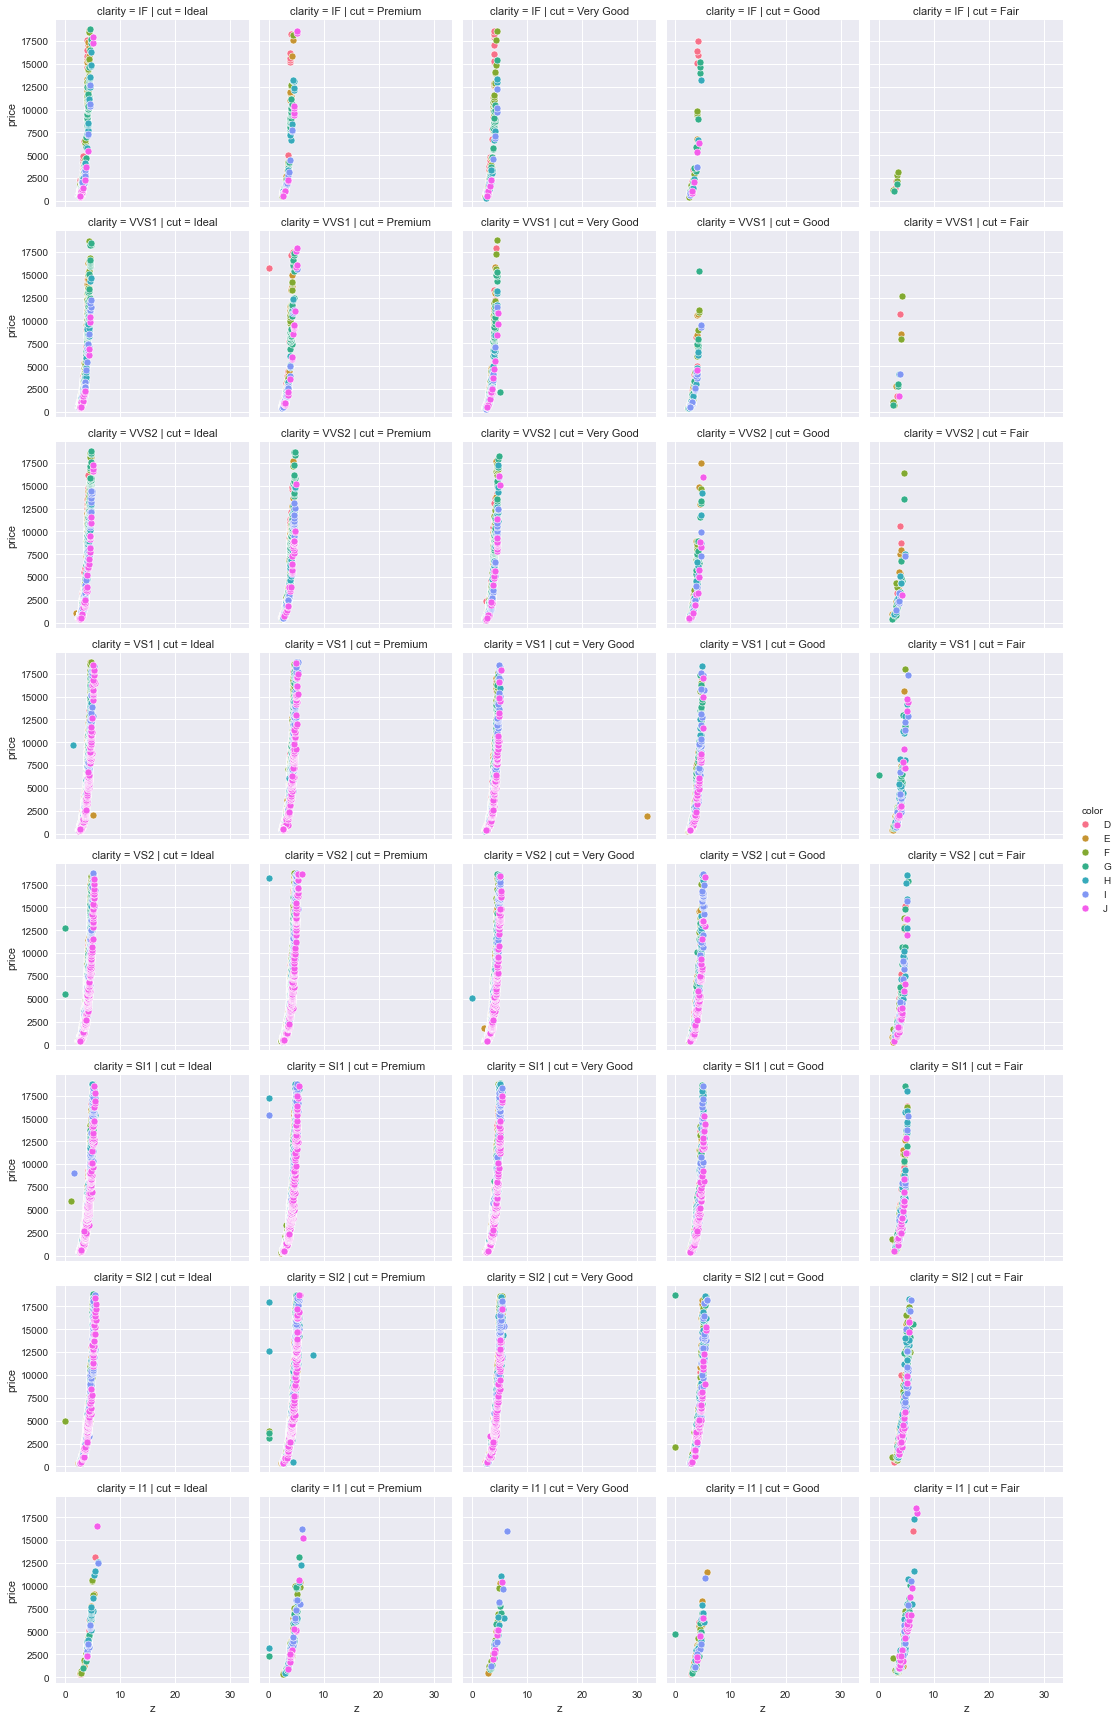

In [25]:
g = sns.FacetGrid(df_diamonds, row='clarity', col='cut', hue='color')
g.map(sns.scatterplot, 'z', 'price')
g.add_legend()
plt.show()

In [26]:
sns.color_palette('husl', 7)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7757319041862729, 0.5784925270759935, 0.19475566538551875),
 (0.5105309046900421, 0.6614299289084904, 0.1930849118538962),
 (0.20433460114757862, 0.6863857739476534, 0.5407103379425205),
 (0.21662978923073606, 0.6676586160122123, 0.7318695594345369),
 (0.5049017849530067, 0.5909119231215284, 0.9584657252128558),
 (0.9587050080494409, 0.3662259565791742, 0.9231469575614251)]

In [27]:
sns.color_palette('rocket', 7)

[(0.18643324, 0.09165431, 0.22699705),
 (0.38092887, 0.12061482, 0.32506528),
 (0.59096382, 0.10810205, 0.35847347),
 (0.7965014, 0.10506637, 0.31063031),
 (0.92676657, 0.29823282, 0.24285536),
 (0.95922872, 0.53307513, 0.3748895),
 (0.96592829, 0.73844258, 0.60053991)]

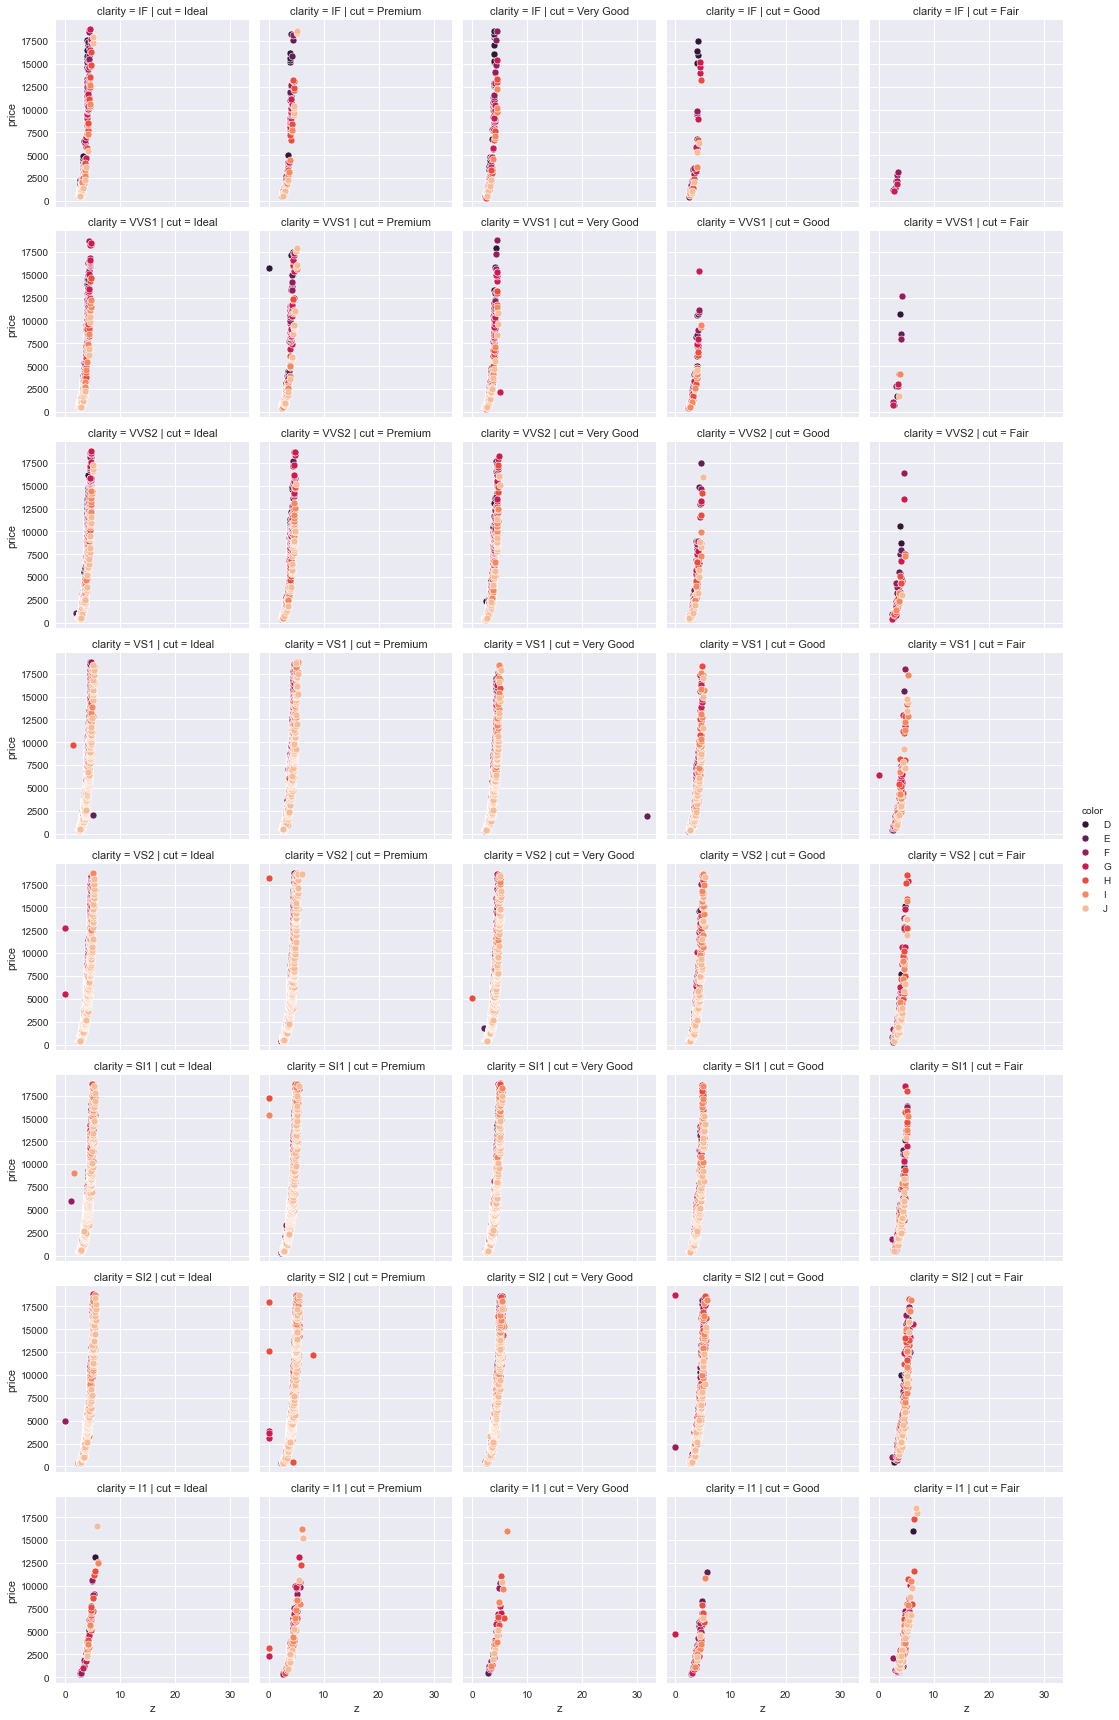

In [28]:
g = sns.FacetGrid(df_diamonds, row='clarity', col='cut', hue='color', palette='rocket')
g.map(sns.scatterplot, 'z', 'price')
g.add_legend()
plt.show()

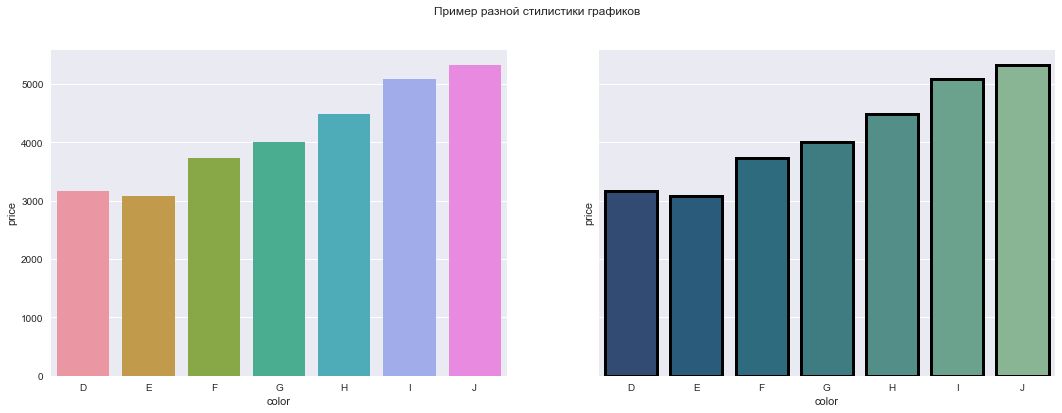

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharey=True)

sns.barplot(data=df_diamonds, ax=axs[0], x='color', y='price', ci=None)
sns.barplot(
    data=df_diamonds, ax=axs[1],
    x='color', y='price', ci=None,
    palette='crest_r', 
    edgecolor='black', linewidth=3,
)

fig.suptitle('Пример разной стилистики графиков')
plt.show()

In [30]:
sns.color_palette("cubehelix", as_cmap=True)